In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# QUES 1

1.MLP Classifier for MNIST Handwritten Digits

Objective: To build, train, evaluate, and visualize the performance of an MLP image classifier using the MNIST dataset.

In [2]:
def load_and_preprocess_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 28*28)
    x_test = x_test.reshape(-1, 28*28)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [3]:
def create_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(784,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [4]:
def train(model, x_train, y_train, x_test, y_test):
    history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    verbose=1)

In [5]:
(x_train , y_train) , (x_test , y_test) = load_and_preprocess_data()
model = create_model()
train(model , x_train , y_train , x_test , y_test)

C:\Users\KabilanMohan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8102 - loss: 0.6080 - val_accuracy: 0.9598 - val_loss: 0.1308
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9594 - loss: 0.1393 - val_accuracy: 0.9701 - val_loss: 0.0996
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9705 - loss: 0.0981 - val_accuracy: 0.9721 - val_loss: 0.0937
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9768 - loss: 0.0727 - val_accuracy: 0.9750 - val_loss: 0.0866
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9809 - loss: 0.0603 - val_accuracy: 0.9782 - val_loss: 0.0769
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9841 - loss: 0.0493 - val_accuracy: 0.9780 - val_loss: 0.0809
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9864 - loss: 0.0427 - val_accuracy: 0.9793 - val_loss: 0.0815
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9881 - loss: 0.0377 - val_accuracy: 

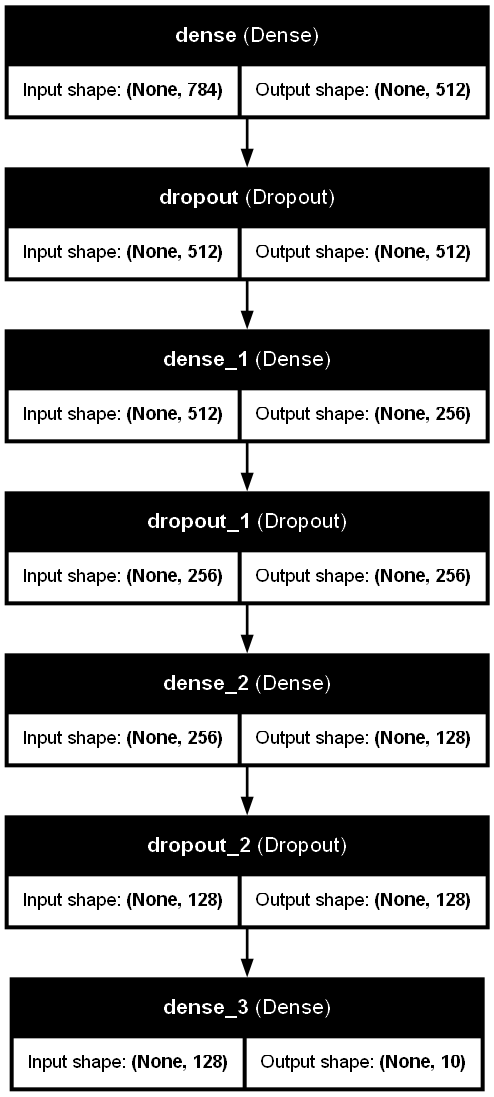

In [6]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

from IPython.display import Image
Image('model.png')

# QUES 2

2.MLP Classifier for CIFAR-10 Dataset

Objective: To build, train, evaluate, and visualize the performance of an MLP image classifier using the CIFAR-10 dataset.

In [7]:
def create_model_cifar():
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, activation='relu', input_shape=(3072,)),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])
    return model

In [8]:
def load_cifar():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data() #load cifar
    return (x_train, y_train), (x_test, y_test)
def preprocess_data_cifar(x_train, y_train,x_test, y_test):
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape(-1, 32*32*3)
    x_test = x_test.reshape(-1, 32*32*3)
    y_train = tf.keras.utils.to_categorical(y_train, 10)
    y_test = tf.keras.utils.to_categorical(y_test, 10)
    return (x_train, y_train), (x_test, y_test)

In [9]:
x_train[0][0].shape

()

In [10]:
(x_train , y_train) , (x_test , y_test) = load_cifar()
(x_train , y_train) , (x_test , y_test) = preprocess_data_cifar(x_train, y_train,x_test, y_test)
cifar_model = create_model_cifar()
train(cifar_model , x_train , y_train , x_test , y_test)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.1914 - loss: 2.1886 - val_accuracy: 0.3222 - val_loss: 1.8766
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3076 - loss: 1.8902 - val_accuracy: 0.3536 - val_loss: 1.7883
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3282 - loss: 1.8370 - val_accuracy: 0.3775 - val_loss: 1.7307
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3591 - loss: 1.7737 - val_accuracy: 0.3961 - val_loss: 1.7076
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3657 - loss: 1.7386 - val_accuracy: 0.4060 - val_loss: 1.6783
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.3757 - loss: 1.7304 - val_accuracy: 0.4113 - val_loss: 1.6433
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3829 - loss: 1.7066 - val_accuracy: 0.4135 - val_loss: 1.6566
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.3852 - loss: 1.6936 - val_accu

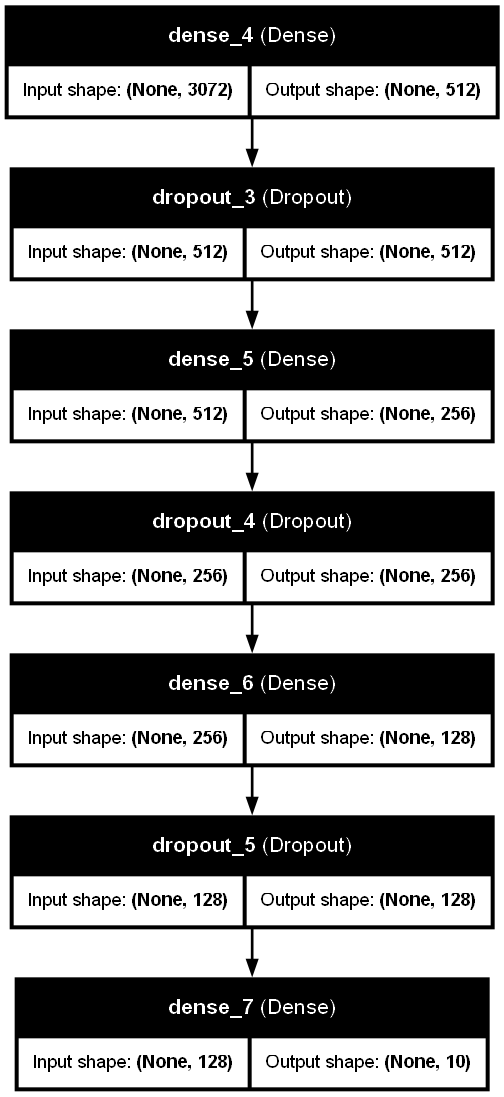

In [11]:
from tensorflow.keras.utils import plot_model
tf.keras.utils.plot_model(
    cifar_model,
    to_file="cifar_model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

from IPython.display import Image
Image('cifar_model.png')